# Mobile Price Classification Using KNN

In [516]:
# Importing the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score 

In [517]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

## Without Normalization

In [519]:
data_set = np.round(data_set, decimals=3) 
data_set.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [520]:
# Dropping the class labels from the dataset
dset_modified = data_set.drop('price_range', axis=1)

In [521]:
data_set_feat = pd.DataFrame(dset_modified, columns=data_set.columns[:-1])
data_set_feat = np.round(data_set_feat, decimals=3)

In [522]:
# Splitting the dataset into training and test subsets
one_train, one_test, two_train, two_test = train_test_split(data_set_feat, data_set['price_range'], test_size=0.20)

In [523]:
# Computing accuracy rates for different values of K (number of neighbours)
Accurate_rates1 = []
for i in range(1,51):
   k_nearest_neighbour = KNeighborsClassifier(n_neighbors = i)
   # Cross Validation
   final_score = cross_val_score(k_nearest_neighbour, data_set_feat, data_set['price_range'], cv=5, verbose=1)
   print(final_score)
   Accurate_rates1.append(final_score.mean())

[0.895  0.915  0.915  0.9125 0.9025]
[0.875  0.925  0.9025 0.89   0.8825]
[0.92   0.92   0.9325 0.9175 0.9075]
[0.915  0.9225 0.915  0.905  0.89  ]
[0.92   0.9175 0.925  0.925  0.91  ]
[0.9175 0.94   0.92   0.9225 0.9025]
[0.9325 0.9375 0.925  0.925  0.905 ]
[0.935  0.9325 0.93   0.92   0.905 ]
[0.9425 0.935  0.9375 0.93   0.91  ]
[0.94   0.94   0.9225 0.9325 0.9225]
[0.9425 0.9375 0.94   0.93   0.9225]
[0.9325 0.94   0.925  0.93   0.9225]
[0.94   0.935  0.9425 0.935  0.9175]
[0.93   0.945  0.9275 0.93   0.9125]
[0.9425 0.935  0.9275 0.925  0.92  ]
[0.935  0.9425 0.925  0.925  0.9125]
[0.9375 0.94   0.9325 0.9275 0.92  ]
[0.94   0.9425 0.93   0.925  0.915 ]
[0.94   0.9375 0.9325 0.9275 0.9225]
[0.9325 0.94   0.9325 0.925  0.92  ]
[0.935  0.935  0.9325 0.93   0.915 ]
[0.93   0.94   0.9275 0.935  0.915 ]
[0.9325 0.9375 0.935  0.9375 0.92  ]
[0.925  0.935  0.9325 0.9325 0.915 ]
[0.93   0.9325 0.935  0.9325 0.925 ]
[0.935  0.945  0.9275 0.94   0.9225]
[0.945  0.9375 0.93   0.935  0.9175]
[

In [524]:
Acc_Rate_Per1 = [el*100 for el in Accurate_rates1]

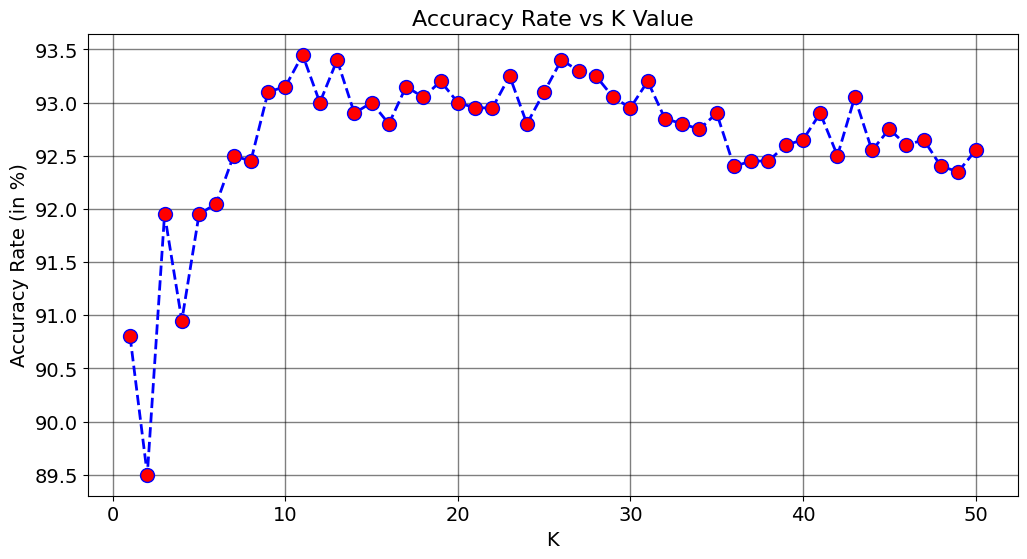

In [525]:
plt.figure(figsize=(12,6))
plt.plot(range(1,51), Acc_Rate_Per1 , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', 
         markersize=10, linewidth=2)
plt.title('Accuracy Rate vs K Value',color='black',fontsize=16)
plt.xlabel('K',color='black',fontsize=14)
plt.ylabel('Accuracy Rate (in %)',color='black',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.5)
plt.show()

### Best Value of K

For K = 11
Test Accuracy (Without Normalization): 96.0 %
Test Precision (Without Normalization): 96.024 %
Test Recall (Without Normalization) 96.026 %
Test F1 Score (Without Normalization): 96.007 %


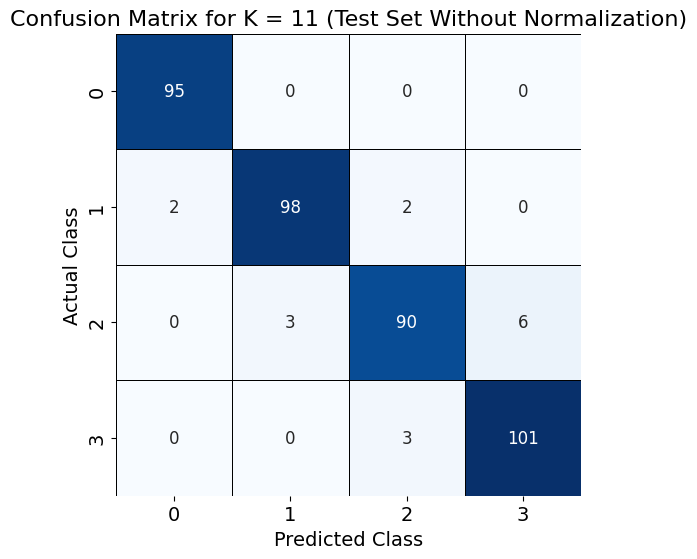

In [526]:
max_index1 = Accurate_rates1.index(max(Accurate_rates1))
k_nearest_neighbour1 = KNeighborsClassifier(n_neighbors=max_index1+1)

k_nearest_neighbour1.fit(one_train, two_train)
prediction1 = k_nearest_neighbour1.predict(one_test)

print('For K =', max_index1+1)
conf_matrix1 = confusion_matrix(two_test, prediction1)
accuracy_test1 = accuracy_score(two_test, prediction1)
precision_test1 = precision_score(two_test, prediction1, average='macro')
recall_test1 = recall_score(two_test, prediction1, average='macro')
f1score_test1 = f1_score(two_test, prediction1, average='macro')

acc_tst1 = round(np.mean(accuracy_test1)*100,3)
pre_tst1 = round(np.mean(precision_test1)*100,3)
rec_tst1 = round(np.mean(recall_test1)*100,3)
f1_tst1 = round(np.mean(f1score_test1)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst1,'%')
print('Test Precision (Without Normalization):',pre_tst1,'%')
print('Test Recall (Without Normalization)',rec_tst1,'%')
print('Test F1 Score (Without Normalization):',f1_tst1,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour1.classes_, yticklabels=k_nearest_neighbour1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(max_index1+1) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

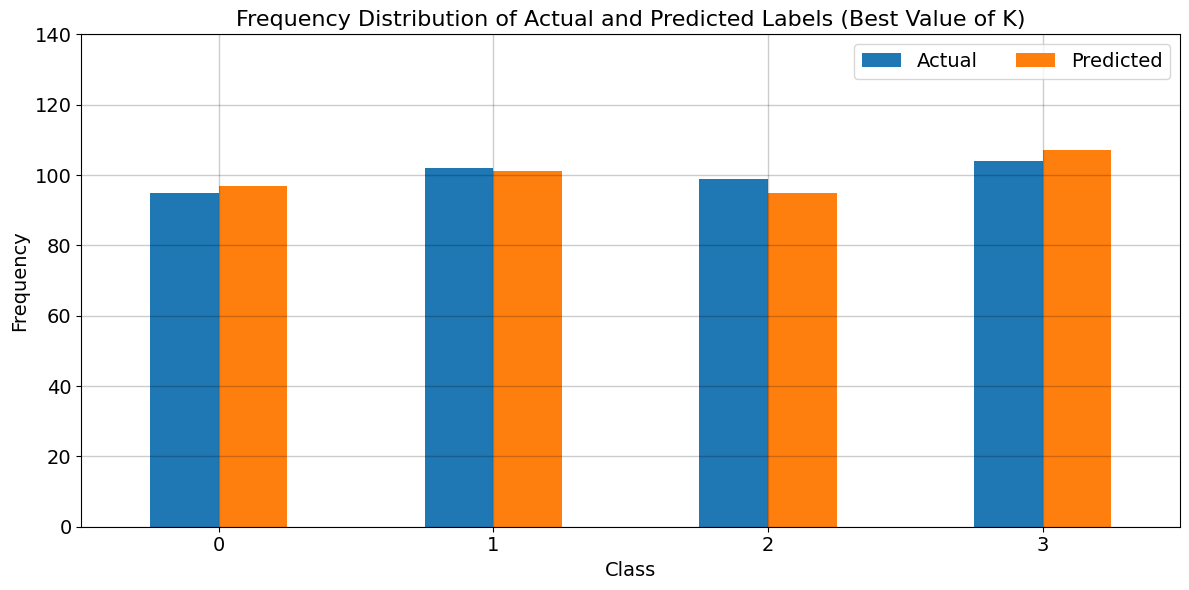

In [527]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels1, predicted_counts1 = np.unique(prediction1, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts1, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Best Value of K)', color='black', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 3

For K = 3
Test Accuracy (Without Normalization): 93.5 %
Test Precision (Without Normalization): 93.515 %
Test Recall (Without Normalization) 93.545 %
Test F1 Score (Without Normalization): 93.522 %


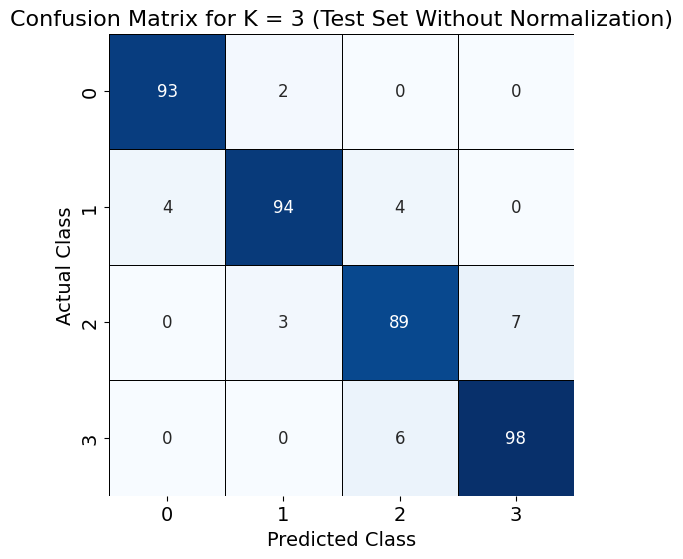

In [528]:
t = 3
k_nearest_neighbour2 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour2.fit(one_train, two_train)
prediction2 = k_nearest_neighbour2.predict(one_test)

print('For K =', t)
conf_matrix2 = confusion_matrix(two_test, prediction2)
accuracy_test2 = accuracy_score(two_test, prediction2)
precision_test2 = precision_score(two_test, prediction2, average='macro')
recall_test2 = recall_score(two_test, prediction2, average='macro')
f1score_test2 = f1_score(two_test, prediction2, average='macro')

acc_tst2 = round(np.mean(accuracy_test2)*100,3)
pre_tst2 = round(np.mean(precision_test2)*100,3)
rec_tst2 = round(np.mean(recall_test2)*100,3)
f1_tst2 = round(np.mean(f1score_test2)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst2,'%')
print('Test Precision (Without Normalization):',pre_tst2,'%')
print('Test Recall (Without Normalization)',rec_tst2,'%')
print('Test F1 Score (Without Normalization):',f1_tst2,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour2.classes_, yticklabels=k_nearest_neighbour2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

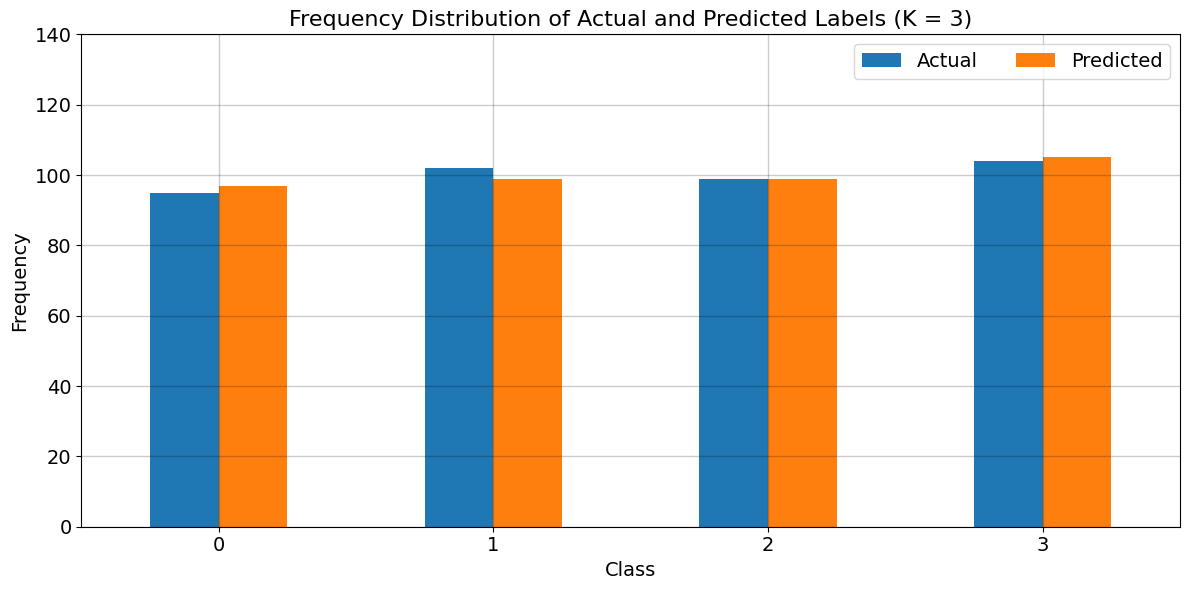

In [529]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels2, predicted_counts2 = np.unique(prediction2, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts2, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 3)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 5

For K = 5
Test Accuracy (Without Normalization): 94.25 %
Test Precision (Without Normalization): 94.314 %
Test Recall (Without Normalization) 94.3 %
Test F1 Score (Without Normalization): 94.3 %


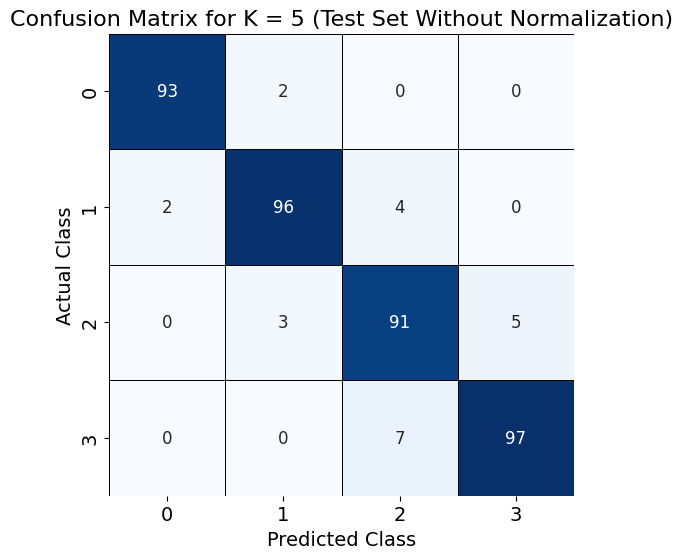

In [530]:
t = 5
k_nearest_neighbour3 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour3.fit(one_train, two_train)
prediction3 = k_nearest_neighbour3.predict(one_test)

print('For K =', t)
conf_matrix3 = confusion_matrix(two_test, prediction3)
accuracy_test3 = accuracy_score(two_test, prediction3)
precision_test3 = precision_score(two_test, prediction3, average='macro')
recall_test3 = recall_score(two_test, prediction3, average='macro')
f1score_test3 = f1_score(two_test, prediction3, average='macro')

acc_tst3 = round(np.mean(accuracy_test3)*100,3)
pre_tst3 = round(np.mean(precision_test3)*100,3)
rec_tst3 = round(np.mean(recall_test3)*100,3)
f1_tst3 = round(np.mean(f1score_test3)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst3,'%')
print('Test Precision (Without Normalization):',pre_tst3,'%')
print('Test Recall (Without Normalization)',rec_tst3,'%')
print('Test F1 Score (Without Normalization):',f1_tst3,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour3.classes_, yticklabels=k_nearest_neighbour3.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

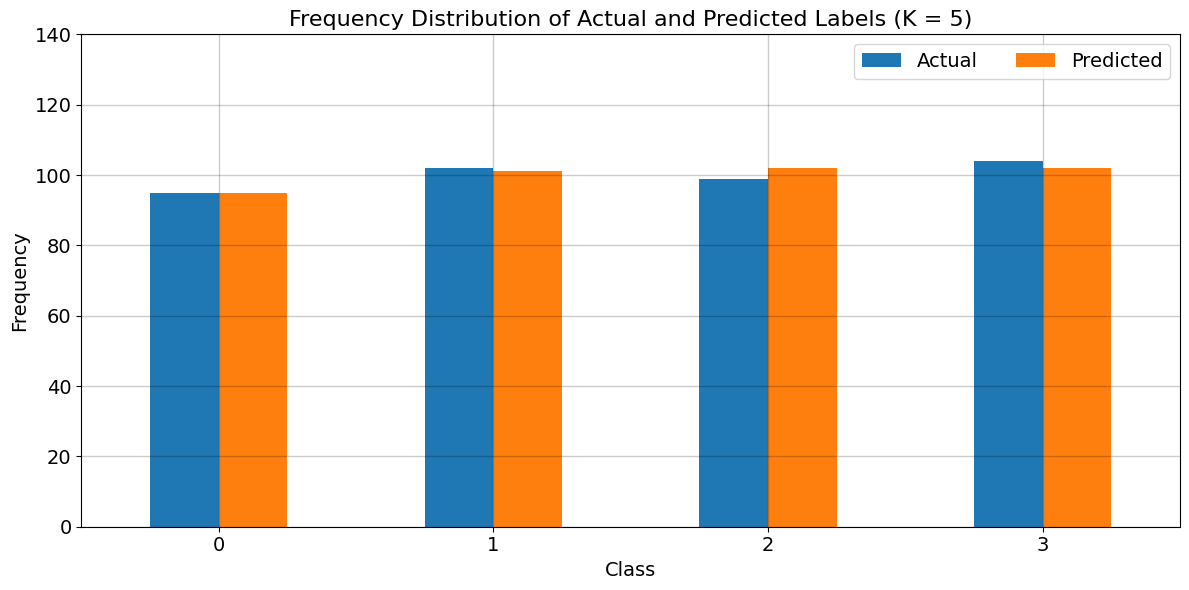

In [531]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels3, predicted_counts3 = np.unique(prediction3, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts3, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 5)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 20

For K = 20
Test Accuracy (Without Normalization): 94.75 %
Test Precision (Without Normalization): 94.75 %
Test Recall (Without Normalization) 94.807 %
Test F1 Score (Without Normalization): 94.774 %


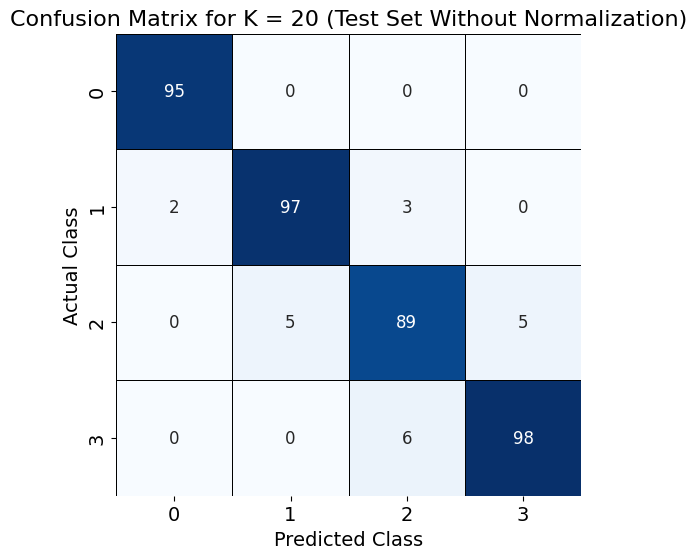

In [532]:
t = 20
k_nearest_neighbour4 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour4.fit(one_train, two_train)
prediction4 = k_nearest_neighbour4.predict(one_test)

print('For K =', t)
conf_matrix4 = confusion_matrix(two_test, prediction4)
accuracy_test4 = accuracy_score(two_test, prediction4)
precision_test4 = precision_score(two_test, prediction4, average='macro')
recall_test4 = recall_score(two_test, prediction4, average='macro')
f1score_test4 = f1_score(two_test, prediction4, average='macro')

acc_tst4 = round(np.mean(accuracy_test4)*100,3)
pre_tst4 = round(np.mean(precision_test4)*100,3)
rec_tst4 = round(np.mean(recall_test4)*100,3)
f1_tst4 = round(np.mean(f1score_test4)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst4,'%')
print('Test Precision (Without Normalization):',pre_tst4,'%')
print('Test Recall (Without Normalization)',rec_tst4,'%')
print('Test F1 Score (Without Normalization):',f1_tst4,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour4.classes_, yticklabels=k_nearest_neighbour4.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

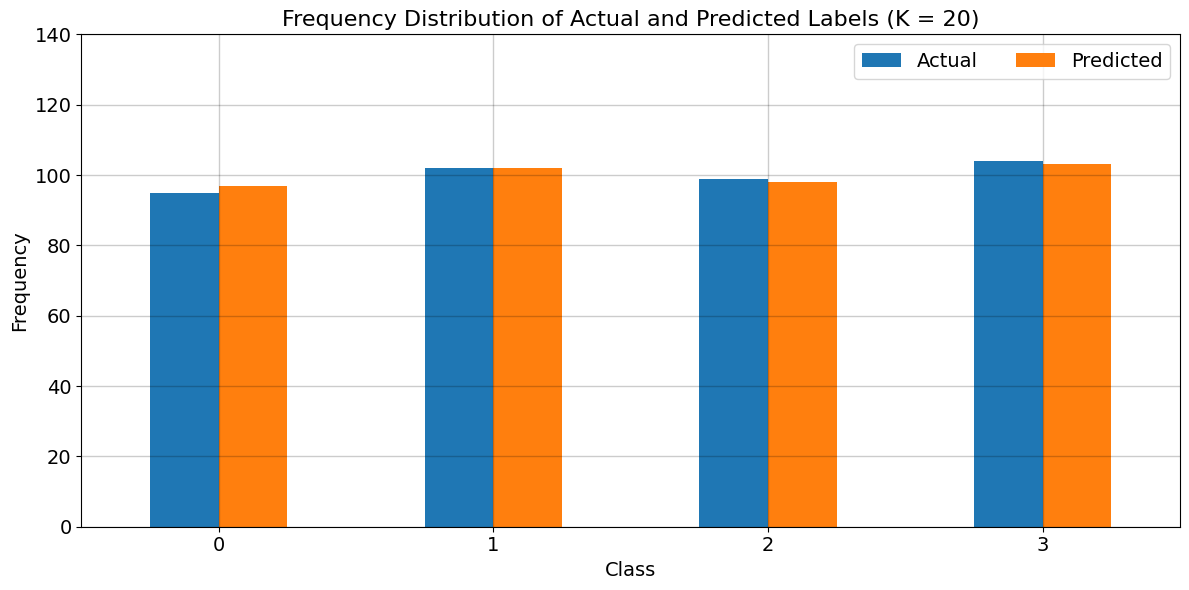

In [533]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels4, predicted_counts4 = np.unique(prediction4, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts4, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 20)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 40

For K = 40
Test Accuracy (Without Normalization): 94.25 %
Test Precision (Without Normalization): 94.233 %
Test Recall (Without Normalization) 94.314 %
Test F1 Score (Without Normalization): 94.265 %


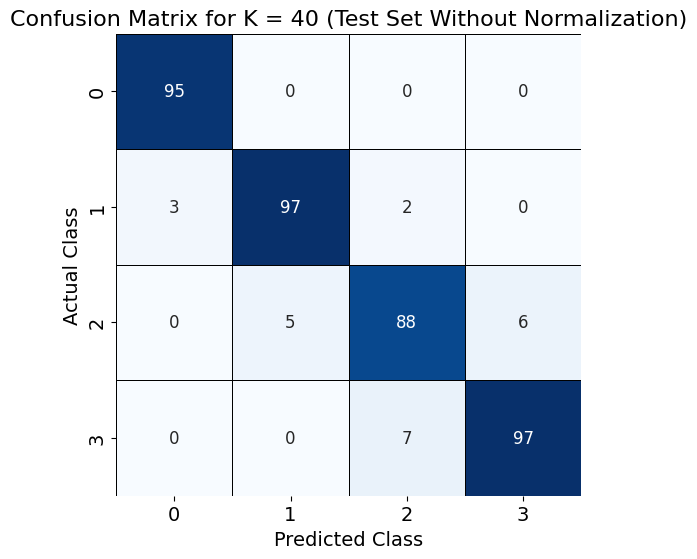

In [534]:
t = 40
k_nearest_neighbour5 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour5.fit(one_train, two_train)
prediction5 = k_nearest_neighbour5.predict(one_test)

print('For K =', t)
conf_matrix5 = confusion_matrix(two_test, prediction5)
accuracy_test5 = accuracy_score(two_test, prediction5)
precision_test5 = precision_score(two_test, prediction5, average='macro')
recall_test5 = recall_score(two_test, prediction5, average='macro')
f1score_test5 = f1_score(two_test, prediction5, average='macro')

acc_tst5 = round(np.mean(accuracy_test5)*100,3)
pre_tst5 = round(np.mean(precision_test5)*100,3)
rec_tst5 = round(np.mean(recall_test5)*100,3)
f1_tst5 = round(np.mean(f1score_test5)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst5,'%')
print('Test Precision (Without Normalization):',pre_tst5,'%')
print('Test Recall (Without Normalization)',rec_tst5,'%')
print('Test F1 Score (Without Normalization):',f1_tst5,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour5.classes_, yticklabels=k_nearest_neighbour5.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

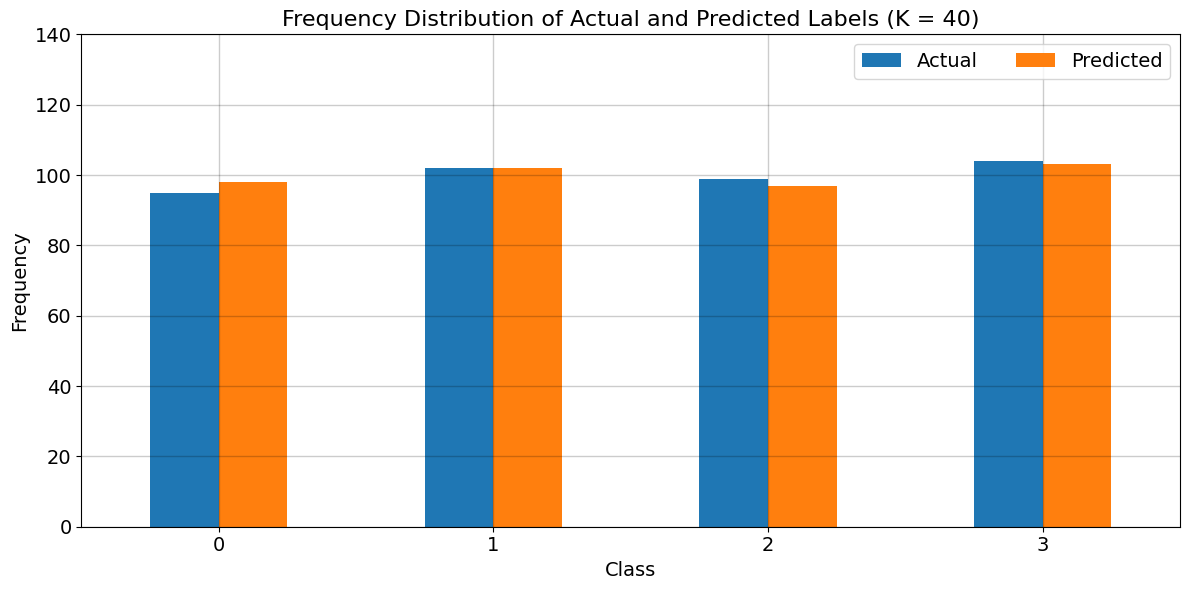

In [535]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels5, predicted_counts5 = np.unique(prediction5, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts5, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 40)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

## With Normalization

In [540]:
scaled = StandardScaler()
scaled.fit(data_set.drop('price_range', axis=1))

StandardScaler()

In [541]:
# Dropping the class labels from the normalized dataset
dset_modified = scaled.transform(data_set.drop('price_range', axis=1)) 

In [542]:
data_set_feat = pd.DataFrame(dset_modified,columns=data_set.columns[:-1]) 
data_set_feat = np.round(data_set_feat, decimals=3) 
data_set_feat.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.903,-0.99,0.831,-1.019,-0.762,-1.044,-1.381,0.341,1.349,-1.102,-1.306,-1.409,-1.147,0.392,-0.785,0.283,1.462,-1.787,-1.006,0.986
1,-0.495,1.01,-1.253,0.981,-0.993,0.958,1.155,0.688,-0.120,-0.665,-0.646,0.586,1.704,0.467,1.114,-0.635,-0.734,0.560,0.994,-1.014
2,-1.538,1.01,-1.253,0.981,-0.532,0.958,0.494,1.381,0.134,0.210,-0.646,1.393,1.075,0.441,-0.310,-0.865,-0.368,0.560,0.994,-1.014
3,-1.419,1.01,1.199,-1.019,-0.993,-1.044,-1.215,1.034,-0.261,0.647,-0.151,1.287,1.237,0.595,0.877,0.513,-0.002,0.560,-1.006,-1.014
4,1.326,1.01,-0.395,-1.019,2.002,0.958,0.659,0.341,0.021,-1.102,0.674,1.269,-0.091,-0.658,-1.022,-0.865,0.730,0.560,0.994,-1.014


In [543]:
# Splitting the dataset into training and test subsets
one_train, one_test, two_train, two_test = train_test_split(data_set_feat, data_set['price_range'], test_size=0.20)

In [544]:
# Computing accuracy rates for different values of K (number of neighbours)
Accurate_rates2 = []
for i in range(1,51):
   k_nearest_neighbour = KNeighborsClassifier(n_neighbors = i)
   # Cross Validation
   final_score = cross_val_score(k_nearest_neighbour, data_set_feat, data_set['price_range'], cv=5)
   print(final_score)
   Accurate_rates2.append(final_score.mean())

[0.445  0.46   0.46   0.47   0.4325]
[0.4275 0.445  0.44   0.4575 0.44  ]
[0.4575 0.4725 0.46   0.4725 0.4375]
[0.485  0.515  0.5075 0.5375 0.485 ]
[0.505  0.5    0.51   0.51   0.4875]
[0.5075 0.5225 0.485  0.54   0.475 ]
[0.5275 0.515  0.495  0.53   0.5025]
[0.525  0.5175 0.49   0.5475 0.5225]
[0.5725 0.56   0.505  0.555  0.5225]
[0.56  0.565 0.535 0.55  0.52 ]
[0.5675 0.5725 0.535  0.57   0.5   ]
[0.56   0.57   0.5525 0.575  0.5325]
[0.5775 0.5925 0.5525 0.58   0.545 ]
[0.585  0.5825 0.5725 0.595  0.54  ]
[0.5675 0.575  0.5725 0.6    0.5425]
[0.59   0.5775 0.5775 0.6025 0.5625]
[0.6    0.585  0.58   0.6025 0.585 ]
[0.6075 0.5925 0.5775 0.5775 0.5775]
[0.6   0.6   0.57  0.605 0.575]
[0.605  0.6025 0.5925 0.6025 0.58  ]
[0.6125 0.6    0.5975 0.595  0.6   ]
[0.6175 0.615  0.605  0.6175 0.61  ]
[0.63   0.6225 0.605  0.6175 0.605 ]
[0.6275 0.6475 0.605  0.615  0.5925]
[0.6175 0.6475 0.6125 0.605  0.6   ]
[0.625  0.645  0.6025 0.63   0.6125]
[0.64   0.6375 0.6075 0.6175 0.6125]
[0.6325 0.6

In [545]:
Acc_Rate_Per2 = [el*100 for el in Accurate_rates2]

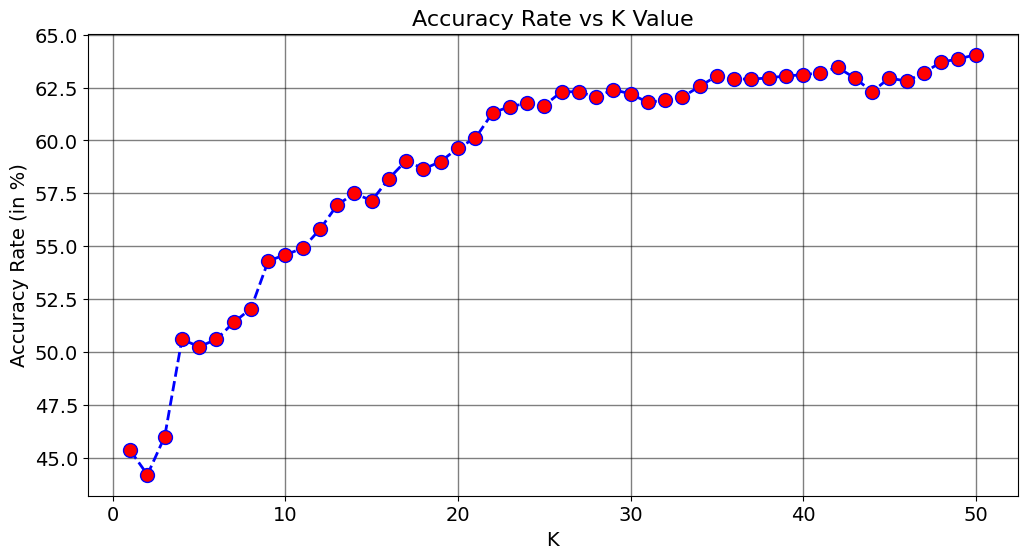

In [546]:
plt.figure(figsize=(12,6))
plt.plot(range(1,51), Acc_Rate_Per2 , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', 
         markersize=10, linewidth=2)
plt.title('Accuracy Rate vs K Value',color='black',fontsize=16)
plt.xlabel('K',color='black',fontsize=14)
plt.ylabel('Accuracy Rate (in %)',color='black',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.5)
plt.show()

### Best Value of K

For K = 50
Test Accuracy (Without Normalization): 61.0 %
Test Precision (Without Normalization): 60.828 %
Test Recall (Without Normalization) 61.629 %
Test F1 Score (Without Normalization): 61.116 %


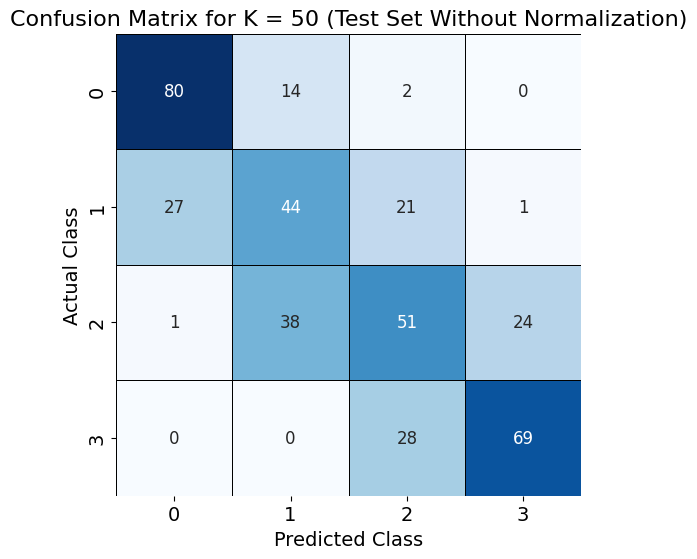

In [547]:
# First K value based on Accurate_rates
max_index2 = Accurate_rates2.index(max(Accurate_rates2))
k_nearest_neighbour6 = KNeighborsClassifier(n_neighbors=max_index2+1)

k_nearest_neighbour6.fit(one_train, two_train)
prediction6 = k_nearest_neighbour6.predict(one_test)

print('For K =', max_index2+1)
conf_matrix6 = confusion_matrix(two_test, prediction6)
accuracy_test6 = accuracy_score(two_test, prediction6)
precision_test6 = precision_score(two_test, prediction6, average='macro')
recall_test6 = recall_score(two_test, prediction6, average='macro')
f1score_test6 = f1_score(two_test, prediction6, average='macro')

acc_tst6 = round(np.mean(accuracy_test6)*100,3)
pre_tst6 = round(np.mean(precision_test6)*100,3)
rec_tst6 = round(np.mean(recall_test6)*100,3)
f1_tst6 = round(np.mean(f1score_test6)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst6,'%')
print('Test Precision (Without Normalization):',pre_tst6,'%')
print('Test Recall (Without Normalization)',rec_tst6,'%')
print('Test F1 Score (Without Normalization):',f1_tst6,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour6.classes_, yticklabels=k_nearest_neighbour6.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(max_index2+1) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

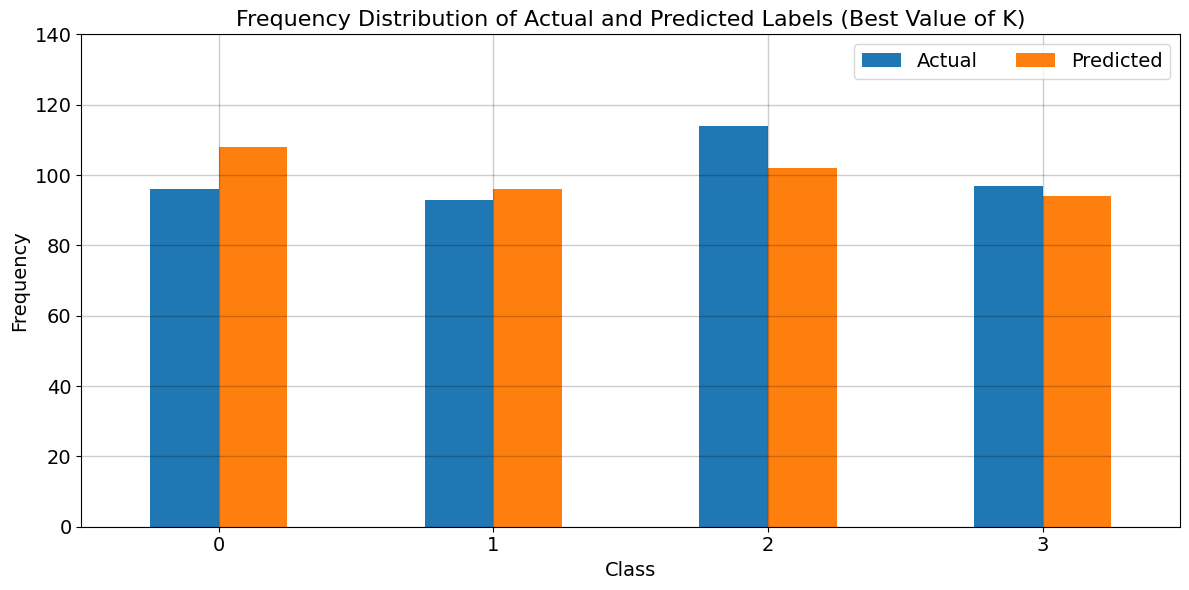

In [548]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels6, predicted_counts6 = np.unique(prediction6, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts6, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Best Value of K)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 3

For K = 3
Test Accuracy (With Normalization): 45.75 %
Test Precision (With Normalization): 46.711 %
Test Recall (With Normalization) 46.734 %
Test F1 Score (With Normalization): 45.564 %


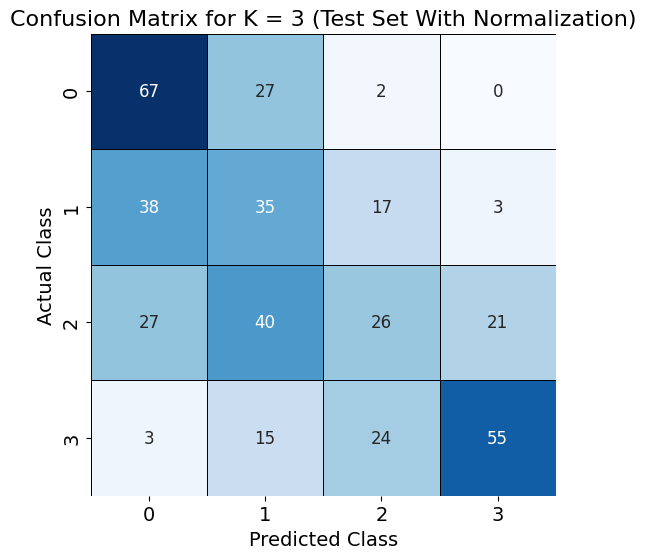

In [549]:
t = 3
k_nearest_neighbour7 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour7.fit(one_train, two_train)
prediction7 = k_nearest_neighbour7.predict(one_test)

print('For K =', t)
conf_matrix7 = confusion_matrix(two_test, prediction7)
accuracy_test7 = accuracy_score(two_test, prediction7)
precision_test7 = precision_score(two_test, prediction7, average='macro')
recall_test7 = recall_score(two_test, prediction7, average='macro')
f1score_test7 = f1_score(two_test, prediction7, average='macro')

acc_tst7 = round(np.mean(accuracy_test7)*100,3)
pre_tst7 = round(np.mean(precision_test7)*100,3)
rec_tst7 = round(np.mean(recall_test7)*100,3)
f1_tst7 = round(np.mean(f1score_test7)*100,3)

print('Test Accuracy (With Normalization):',acc_tst7,'%')
print('Test Precision (With Normalization):',pre_tst7,'%')
print('Test Recall (With Normalization)',rec_tst7,'%')
print('Test F1 Score (With Normalization):',f1_tst7,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix7, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour7.classes_, yticklabels=k_nearest_neighbour7.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

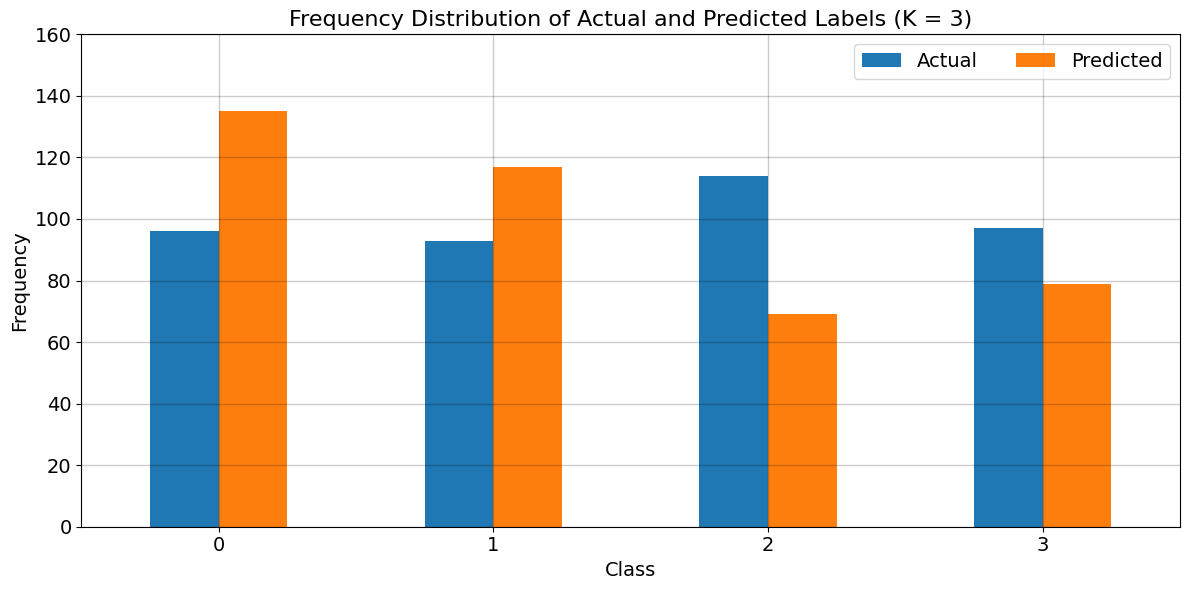

In [550]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels7, predicted_counts7 = np.unique(prediction7, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts7, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 3)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,160))
fig.tight_layout()
plt.show()

### K = 5

For K = 5
Test Accuracy (Wit Normalization): 47.5 %
Test Precision (With Normalization): 48.458 %
Test Recall (With Normalization) 48.354 %
Test F1 Score (With Normalization): 47.957 %


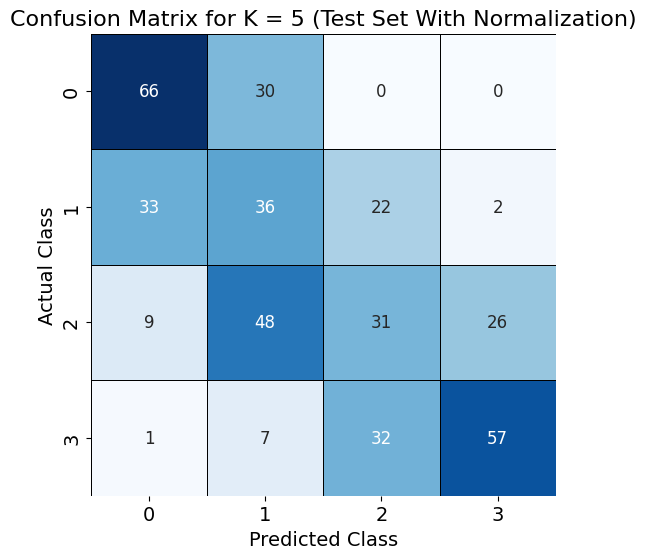

In [551]:
t = 5
k_nearest_neighbour8 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour8.fit(one_train, two_train)
prediction8 = k_nearest_neighbour8.predict(one_test)

print('For K =', t)
conf_matrix8 = confusion_matrix(two_test, prediction8)
accuracy_test8 = accuracy_score(two_test, prediction8)
precision_test8 = precision_score(two_test, prediction8, average='macro')
recall_test8 = recall_score(two_test, prediction8, average='macro')
f1score_test8 = f1_score(two_test, prediction8, average='macro')

acc_tst8 = round(np.mean(accuracy_test8)*100,3)
pre_tst8 = round(np.mean(precision_test8)*100,3)
rec_tst8 = round(np.mean(recall_test8)*100,3)
f1_tst8 = round(np.mean(f1score_test8)*100,3)

print('Test Accuracy (Wit Normalization):',acc_tst8,'%')
print('Test Precision (With Normalization):',pre_tst8,'%')
print('Test Recall (With Normalization)',rec_tst8,'%')
print('Test F1 Score (With Normalization):',f1_tst8,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix8, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour8.classes_, yticklabels=k_nearest_neighbour8.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

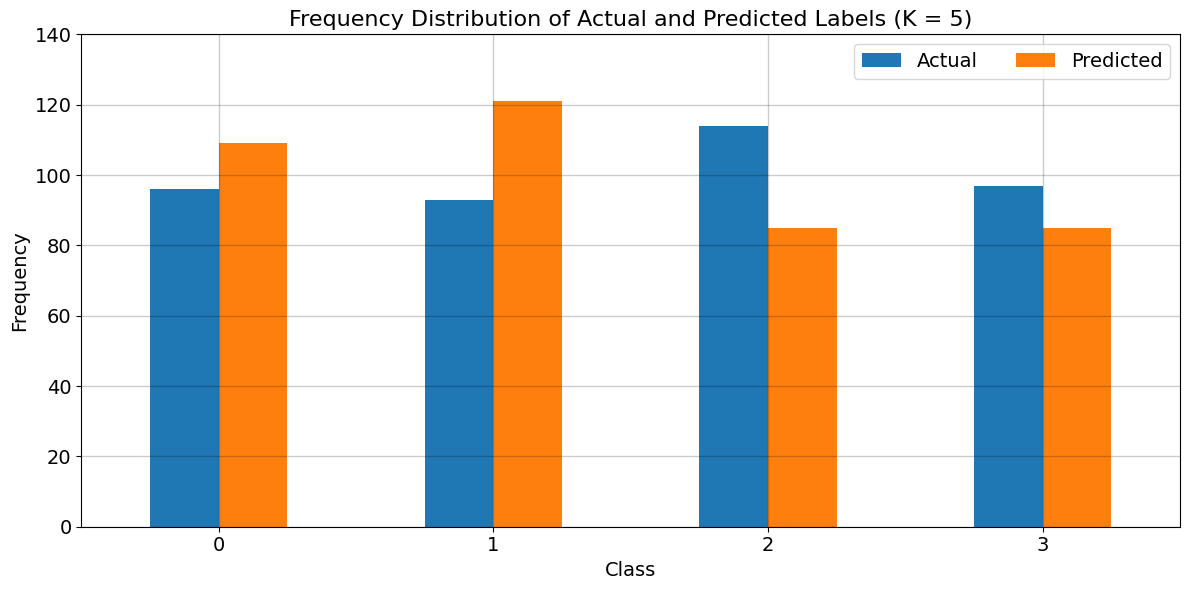

In [552]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels8, predicted_counts8 = np.unique(prediction8, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts8, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 5)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 20

For K = 20
Test Accuracy (With Normalization): 53.25 %
Test Precision (With Normalization): 53.037 %
Test Recall (With Normalization) 54.065 %
Test F1 Score (With Normalization): 53.376 %


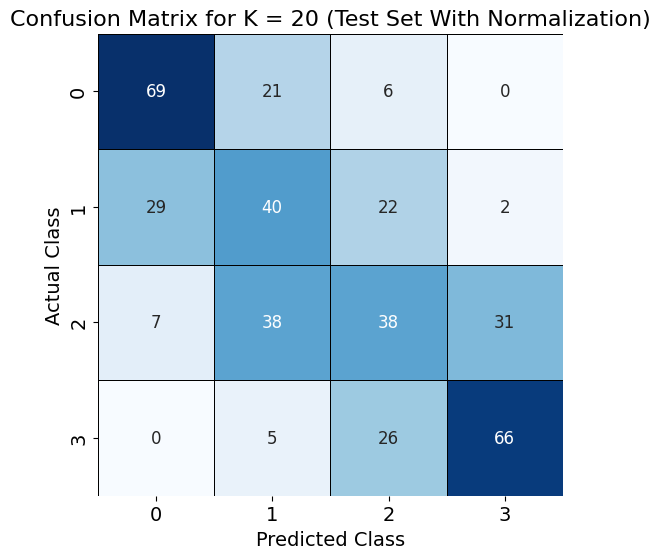

In [553]:
t = 20
k_nearest_neighbour9 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour9.fit(one_train, two_train)
prediction9 = k_nearest_neighbour9.predict(one_test)

print('For K =', t)
conf_matrix9 = confusion_matrix(two_test, prediction9)
accuracy_test9 = accuracy_score(two_test, prediction9)
precision_test9 = precision_score(two_test, prediction9, average='macro')
recall_test9 = recall_score(two_test, prediction9, average='macro')
f1score_test9 = f1_score(two_test, prediction9, average='macro')

acc_tst9 = round(np.mean(accuracy_test9)*100,3)
pre_tst9 = round(np.mean(precision_test9)*100,3)
rec_tst9 = round(np.mean(recall_test9)*100,3)
f1_tst9 = round(np.mean(f1score_test9)*100,3)

print('Test Accuracy (With Normalization):',acc_tst9,'%')
print('Test Precision (With Normalization):',pre_tst9,'%')
print('Test Recall (With Normalization)',rec_tst9,'%')
print('Test F1 Score (With Normalization):',f1_tst9,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix9, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour9.classes_, yticklabels=k_nearest_neighbour9.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

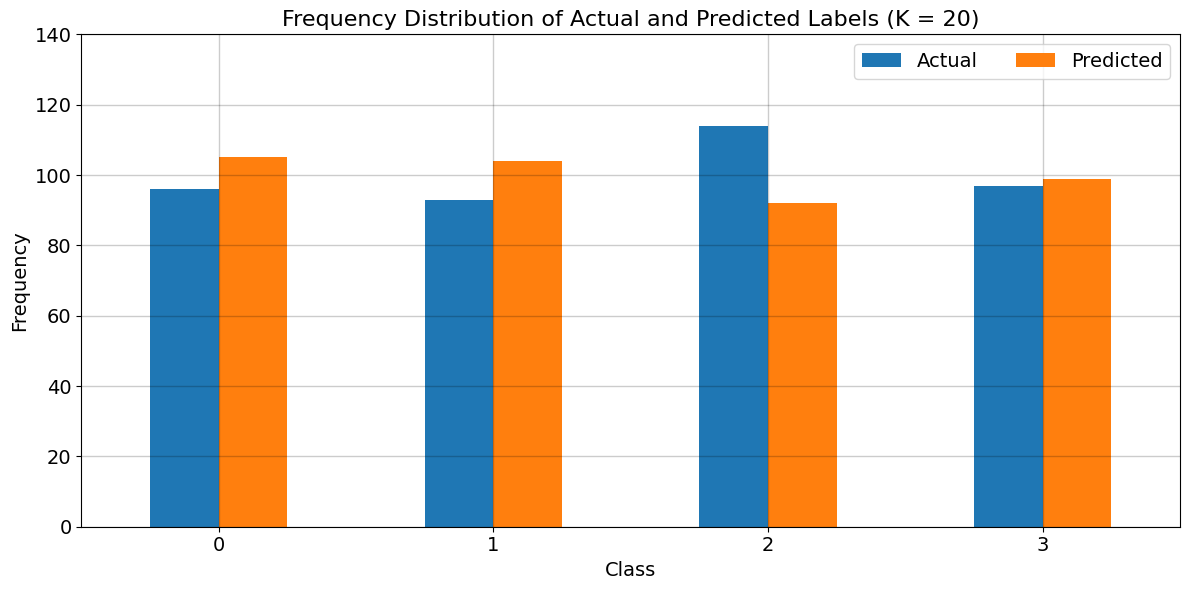

In [554]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels9, predicted_counts9 = np.unique(prediction9, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts9, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 20)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 40

For K = 40
Test Accuracy (With Normalization): 60.75 %
Test Precision (With Normalization): 60.28 %
Test Recall (With Normalization) 61.476 %
Test F1 Score (With Normalization): 60.701 %


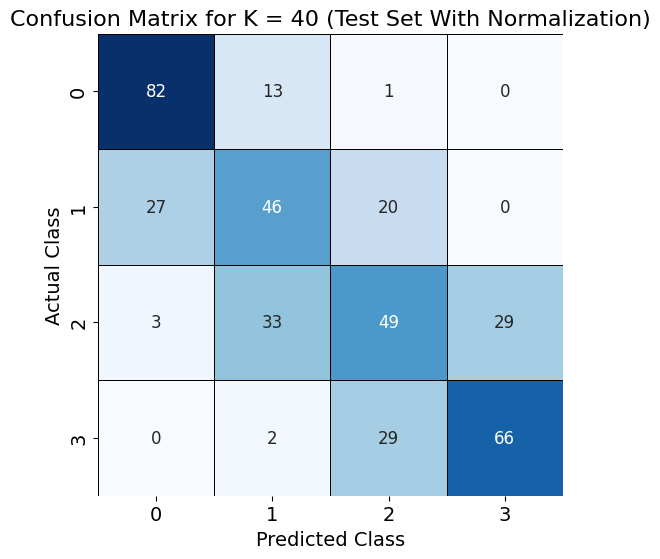

In [555]:
t = 40
k_nearest_neighbour10 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour10.fit(one_train, two_train)
prediction10 = k_nearest_neighbour10.predict(one_test)

print('For K =', t)
conf_matrix10 = confusion_matrix(two_test, prediction10)
accuracy_test10 = accuracy_score(two_test, prediction10)
precision_test10 = precision_score(two_test, prediction10, average='macro')
recall_test10 = recall_score(two_test, prediction10, average='macro')
f1score_test10 = f1_score(two_test, prediction10, average='macro')

acc_tst10 = round(np.mean(accuracy_test10)*100,3)
pre_tst10 = round(np.mean(precision_test10)*100,3)
rec_tst10 = round(np.mean(recall_test10)*100,3)
f1_tst10 = round(np.mean(f1score_test10)*100,3)

print('Test Accuracy (With Normalization):',acc_tst10,'%')
print('Test Precision (With Normalization):',pre_tst10,'%')
print('Test Recall (With Normalization)',rec_tst10,'%')
print('Test F1 Score (With Normalization):',f1_tst10,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix10, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour10.classes_, yticklabels=k_nearest_neighbour10.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

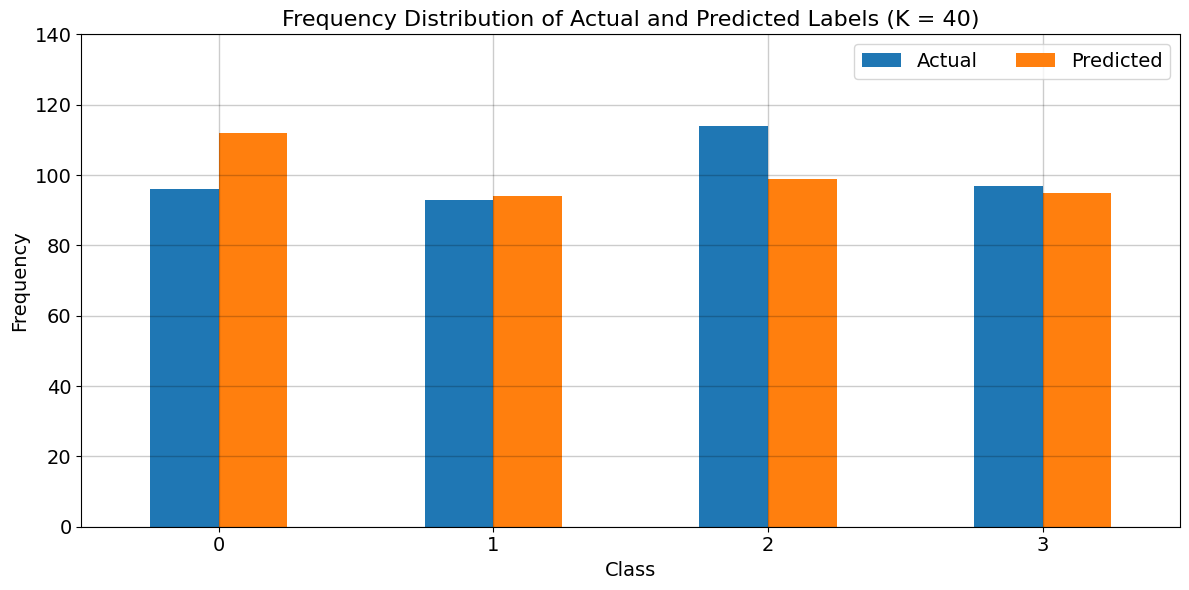

In [556]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels10, predicted_counts10 = np.unique(prediction10, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts10, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 40)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

***